# Exploratory analysis of trees in Cambridge, MA

In [1]:
#Various imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from io import StringIO
import seaborn as sns
import urllib
import sys
import plotly
import igraph
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline 
from matplotlib import rcParams
from ast import literal_eval
import numpy.random as npr

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
# rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
# rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.labelsize'] = 18
rcParams['axes.titlesize'] = 18

# Check the python version
print('Python version:', sys.version)

/Users/hannah/git/PyMaid
Python version: 3.5.2 |Anaconda custom (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]


/Users/hannah/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:913: UserWarning:

axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.



In [5]:
%cd /Users/hannah/Desktop/Cambridge_Tree_Viz
# Data from: https://www.cambridgema.gov/GIS/gisdatadictionary/Environmental/ENVIRONMENTAL_StreetTrees

cambridge_tree_df = pd.read_csv('ENVIRONMENTAL_StreetTrees.csv')
cambridge_tree_df.head()

/Users/hannah/Desktop/Cambridge_Tree_Viz


/Users/hannah/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (29,45) have mixed types. Specify dtype option on import or set low_memory=False.



,the_geom,modified,trunks,created,SiteType,PlantDate,RemovalDat,SpeciesSho,TreeCondit,OverheadWi,...,inspectr,species,Order_,PlantingCo,SourceNurs,WateringRe,notes,LocationRe,SiteReplan,SiteRetire
0,"{type=Point, coordinates=List(-71.116314320322...",08/12/2016 12:00:00 AM +0000,1,09/22/2005 12:00:00 AM +0000,Tree,11/30/1899 12:00:00 AM +0000,11/30/1899 12:00:00 AM +0000,Linden,Good,0,...,LGilbert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{type=Point, coordinates=List(-71.116463606176...",08/12/2016 12:00:00 AM +0000,1,09/22/2005 12:00:00 AM +0000,Tree,05/31/2012 12:00:00 AM +0000,11/30/1899 12:00:00 AM +0000,Maple,Fair,1,...,LGilbert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{type=Point, coordinates=List(-71.117121295780...",08/12/2016 12:00:00 AM +0000,1,09/22/2005 12:00:00 AM +0000,Tree,11/30/1899 12:00:00 AM +0000,11/30/1899 12:00:00 AM +0000,Maple,Good,1,...,LGilbert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{type=Point, coordinates=List(-71.117457233419...",08/12/2016 12:00:00 AM +0000,1,09/22/2005 12:00:00 AM +0000,Tree,11/30/1899 12:00:00 AM +0000,11/30/1899 12:00:00 AM +0000,Maple,Good,1,...,LGilbert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{type=Point, coordinates=List(-71.117663150576...",08/12/2016 12:00:00 AM +0000,1,09/22/2005 12:00:00 AM +0000,Tree,11/30/1899 12:00:00 AM +0000,11/30/1899 12:00:00 AM +0000,Honeylocust,Good,1,...,LGilbert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## When were trees planted?

In [38]:
# Convert to datetime object
cambridge_tree_df['PlantDate'] = pd.to_datetime(cambridge_tree_df['PlantDate'],infer_datetime_format=True)
cambridge_tree_plant_date_df = cambridge_tree_df.copy()
cambridge_tree_plant_date_df.head()
cambridge_tree_plant_date_df.index =cambridge_tree_plant_date_df['PlantDate']
del cambridge_tree_plant_date_df['PlantDate']
cambridge_tree_plant_date_df.head()

,the_geom,modified,trunks,created,SiteType,RemovalDat,SpeciesSho,TreeCondit,OverheadWi,Cultivar,...,inspectr,species,Order_,PlantingCo,SourceNurs,WateringRe,notes,LocationRe,SiteReplan,SiteRetire
PlantDate,,,,,,,,,,,,,,,,,,,,,
1899-11-30,"{type=Point, coordinates=List(-71.116314320322...",08/12/2016 12:00:00 AM +0000,1,09/22/2005 12:00:00 AM +0000,Tree,11/30/1899 12:00:00 AM +0000,Linden,Good,0,NaN,...,LGilbert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-31,"{type=Point, coordinates=List(-71.116463606176...",08/12/2016 12:00:00 AM +0000,1,09/22/2005 12:00:00 AM +0000,Tree,11/30/1899 12:00:00 AM +0000,Maple,Fair,1,NaN,...,LGilbert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1899-11-30,"{type=Point, coordinates=List(-71.117121295780...",08/12/2016 12:00:00 AM +0000,1,09/22/2005 12:00:00 AM +0000,Tree,11/30/1899 12:00:00 AM +0000,Maple,Good,1,NaN,...,LGilbert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1899-11-30,"{type=Point, coordinates=List(-71.117457233419...",08/12/2016 12:00:00 AM +0000,1,09/22/2005 12:00:00 AM +0000,Tree,11/30/1899 12:00:00 AM +0000,Maple,Good,1,NaN,...,LGilbert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1899-11-30,"{type=Point, coordinates=List(-71.117663150576...",08/12/2016 12:00:00 AM +0000,1,09/22/2005 12:00:00 AM +0000,Tree,11/30/1899 12:00:00 AM +0000,Honeylocust,Good,1,NaN,...,LGilbert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
cambridge_tree_plant_date_df = cambridge_tree_plant_date_df[['SpeciesSho']]
# cambridge_tree_plant_date_df.groupby(level=0).count()
# cambridge_tree_plant_date_df.resample('D').sum().plot()
cambridge_tree_plant_date_df['SpeciesSho'].describe()

count     26865
unique       72
top       Maple
freq       5628
Name: SpeciesSho, dtype: object

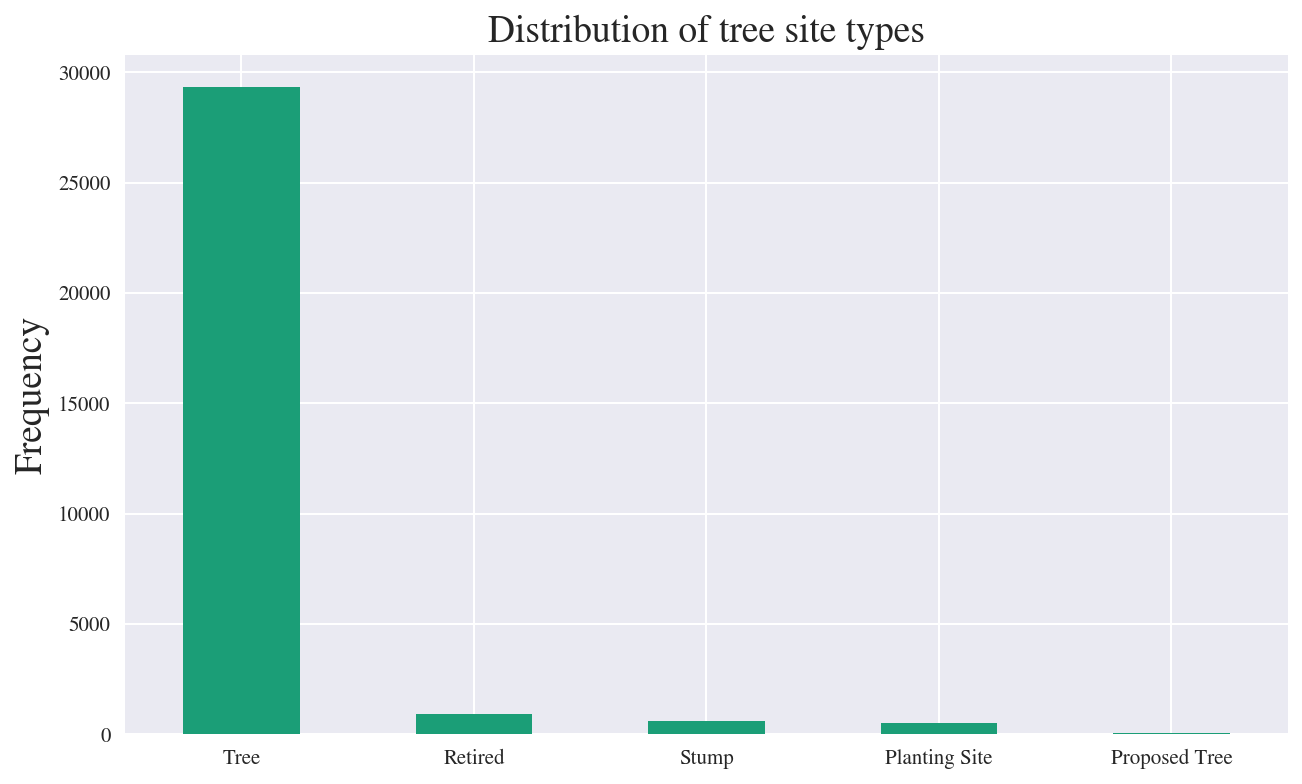

In [65]:
# Lets look at the distribution of site types
cambridge_tree_df['SiteType'].value_counts()
num_living_trees = x[0]
num_retired_trees = x[1] # Now unavailable for planting
num_stump_trees = x[2]
num_empty_planting_sites = x[3]
num_proposed_tree_sites = x[4]

ax = cambridge_tree_df['SiteType'].value_counts().plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.ylabel('Frequency')
plt.title('Distribution of tree site types')

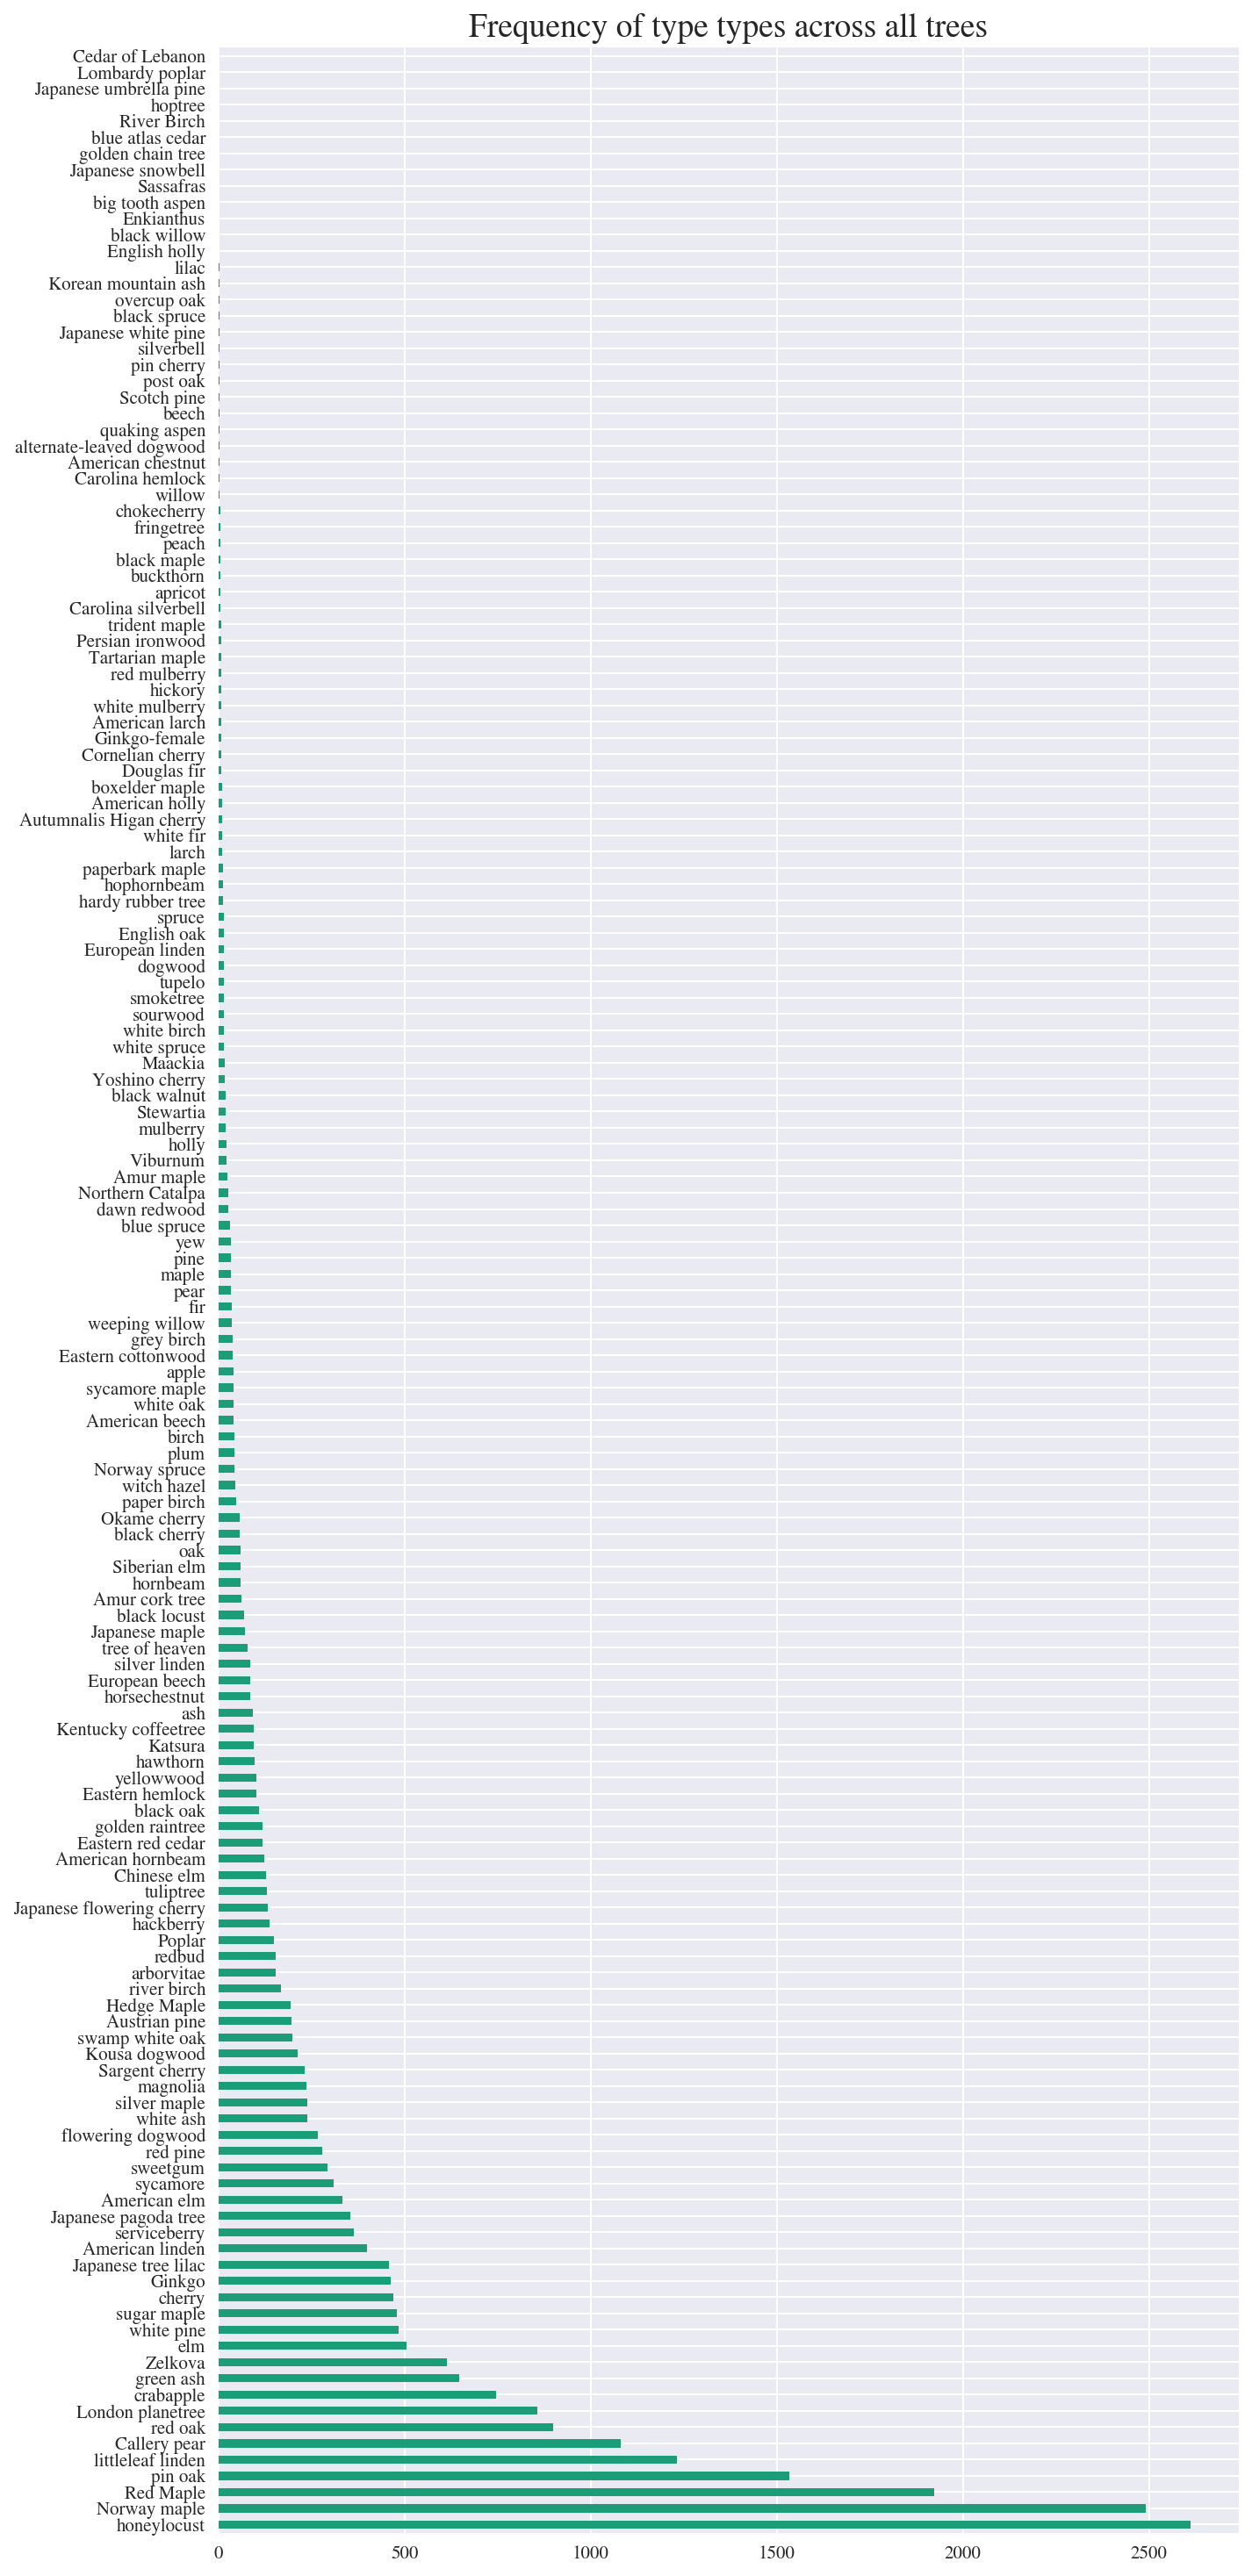

In [67]:
# Plot common name of ALL trees
cambridge_tree_df['CommonName'].value_counts().plot(kind='barh', figsize = (10, 25))
plt.title('Frequency of type types across all trees')

Number of living trees: 29334


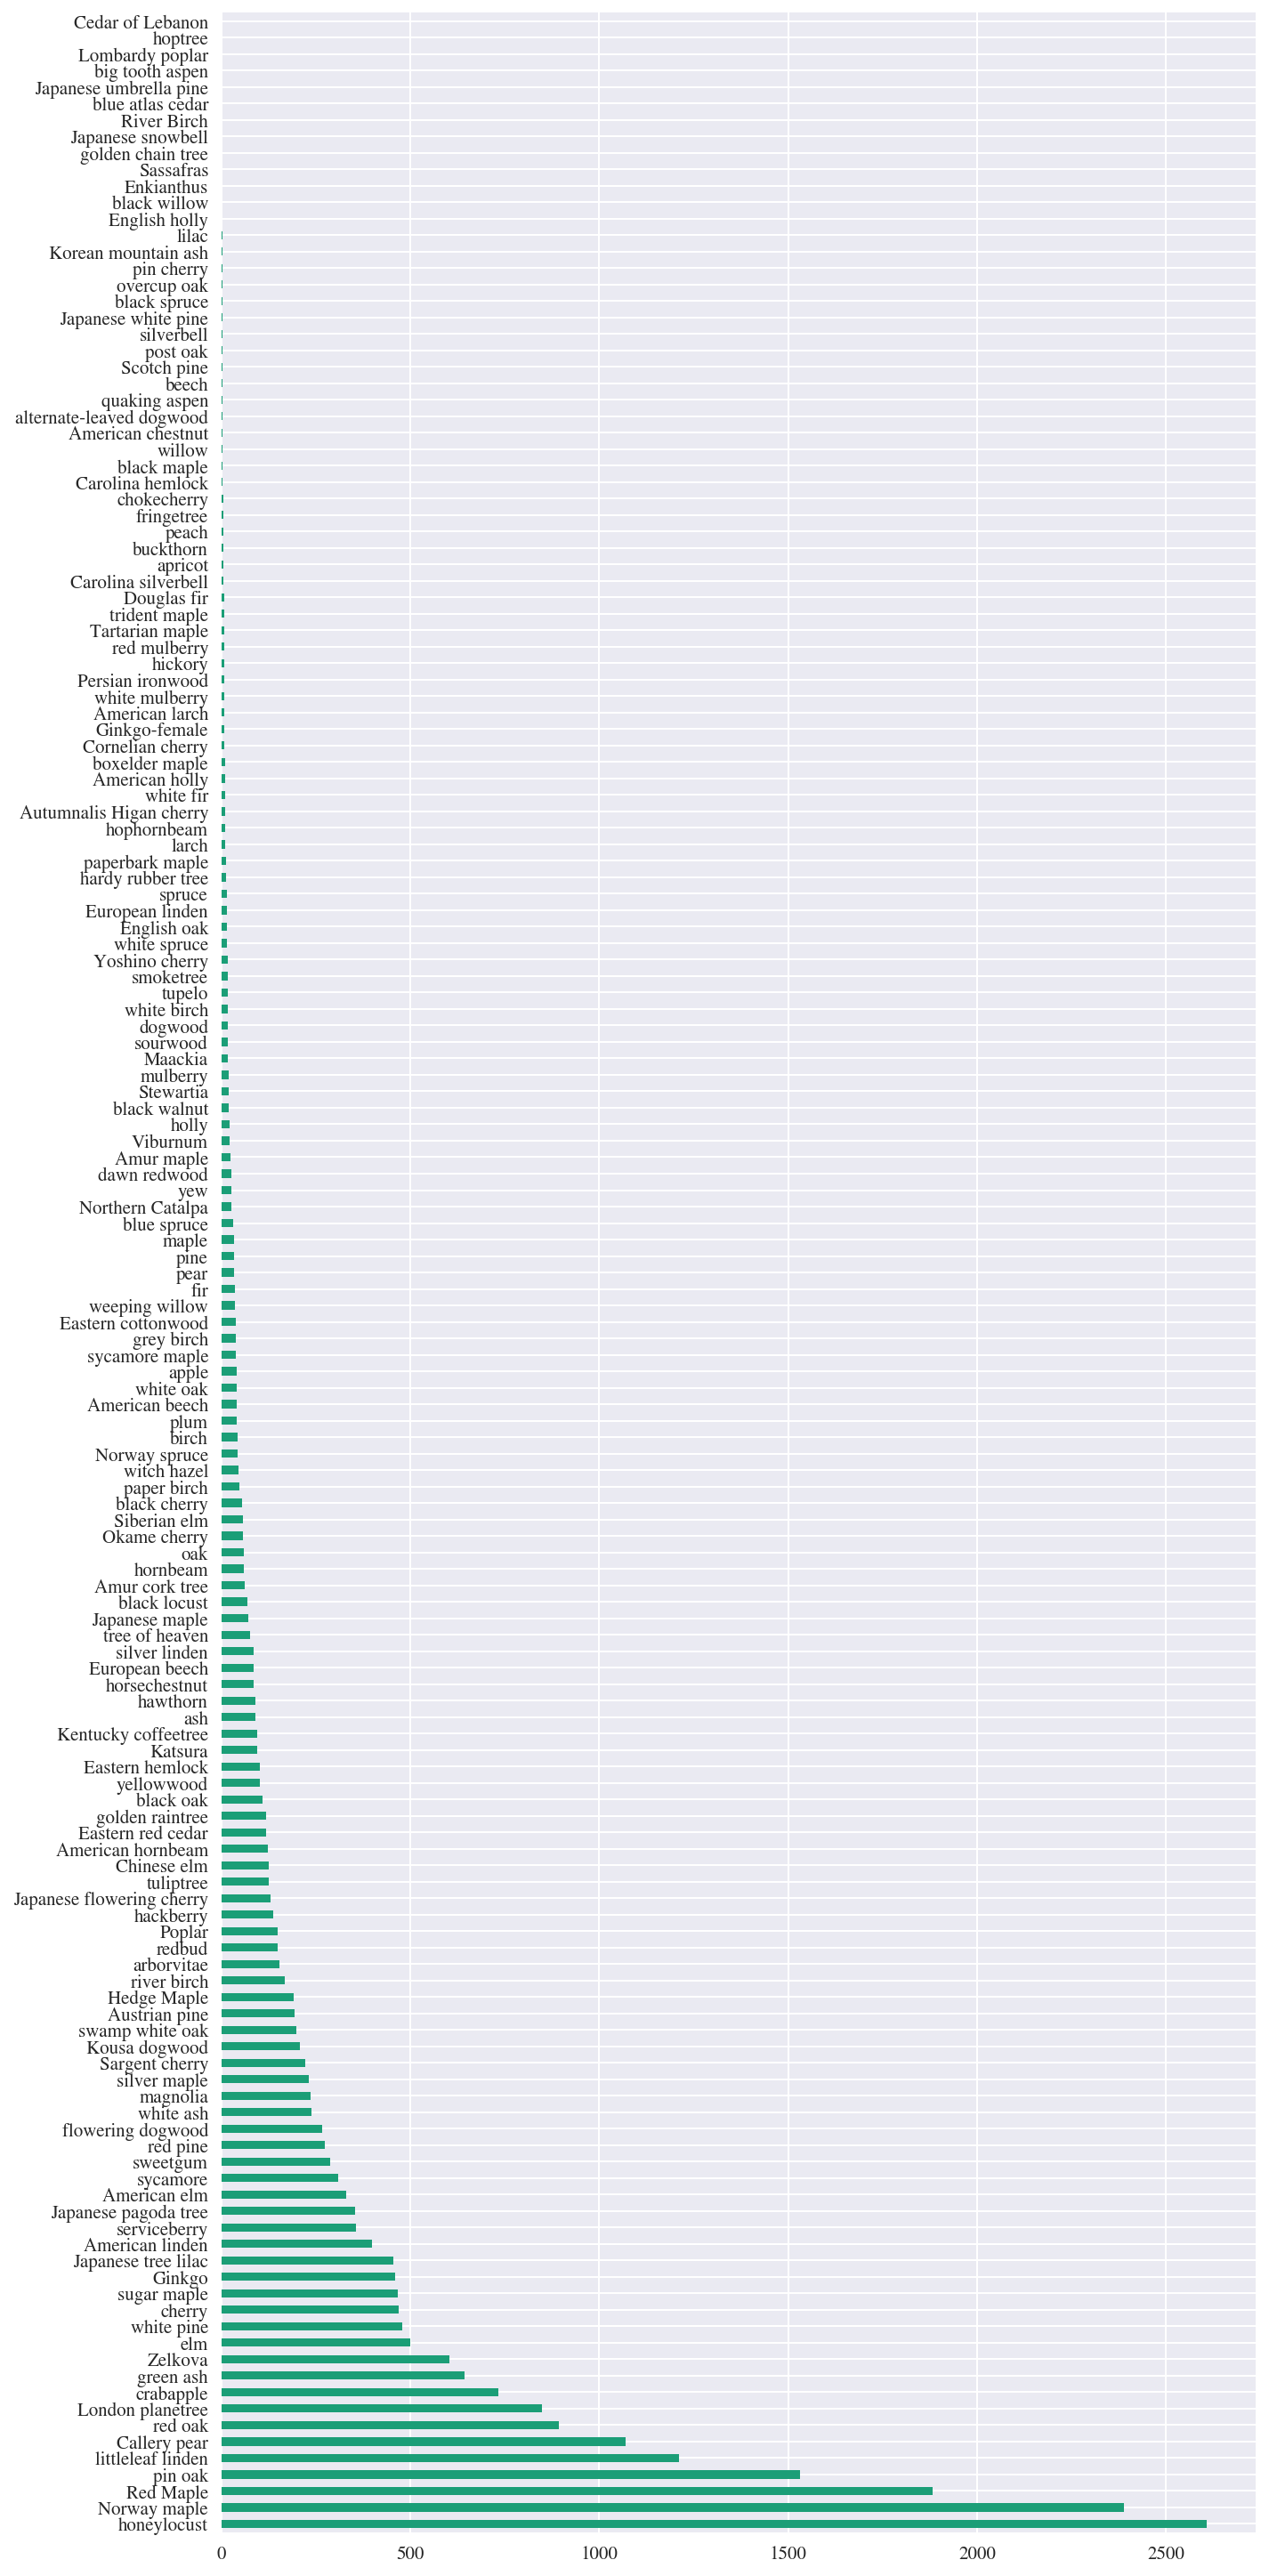

In [79]:
# Now, lets look at just living trees
living_trees_df = cambridge_tree_df[cambridge_tree_df['SiteType'] == 'Tree']
print('Number of living trees:', living_trees_df.shape[0])
living_trees_df['CommonName'].value_counts().plot(kind = 'barh', figsize = (10, 25))

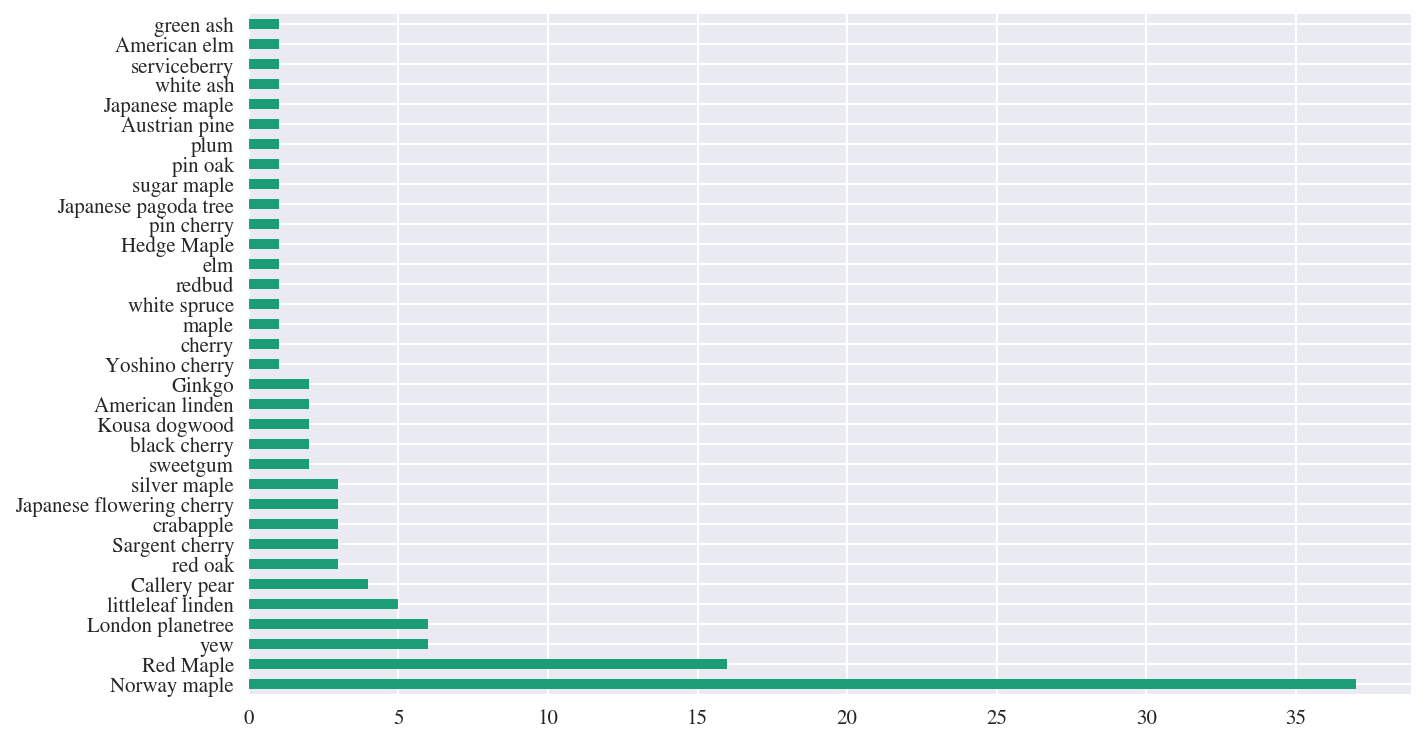

In [71]:
# Are there particular tree types that are removed?
removed_trees_df = cambridge_tree_df[cambridge_tree_df['SiteType'] == 'Retired']

# Plot common name of "retired trees
removed_trees_df['CommonName'].value_counts().plot(kind='barh')

We seem to have more norway and red maples removed than other trees. However, overall we have more of these trees than the others, so let's normalize these values such that we look at the percent of each tree type that's removed.

In [72]:
cambridge_tree_df.shape

(31481, 52)